# Lot sizing
*This notebook illustrates how to size a lot. 
*Use the virtual environment logproj.yml to run this notebook.*
***
Alessandro Tufano 2020

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe

#import utilities
from logproj.utilities import creaCartella

### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from logproj.data_generator_distribution import generateDistributionData

#random generation of distribution data
_, _, _, D_mov = generateDistributionData(num_movements=2500, num_parts = 100)


In [4]:
#print nodes dataframe
display(HTML(D_mov.head().to_html()))

,LOADING_NODE,LOADING_NODE_DESCRIPTION,LOADING_NODE_LATITUDE,LOADING_NODE_LONGITUDE,PTA_FROM,PTD_FROM,ATA_FROM,ATD_FROM,DISCHARGING_NODE,DISCHARGING_NODE_DESCRIPTION,DISCHARGING_LATITUDE,DISCHARGING_LONGITUDE,PTA_TO,PTD_TO,ATA_TO,ATD_TO,ITEMCODE,PRODUCT_FAMILY,CLIENT,VEHICLE_CODE,VOYAGE_CODE,QUANTITY,TIMESTAMP_IN,PACKAGE_DESCRIPTION,USER
0,0,NODE_0,41.625757,14.216892,2020-01-02 00:00:00.000000,2020-01-02 01:00:00.000000,2020-01-01 23:31:56.914225,2020-01-02 00:37:23.848517,5,NODE_5,41.813136,14.025289,2020-01-02 09:50:32.425747,2020-01-02 10:50:32.425747,2020-01-02 10:06:19.301988,2020-01-02 10:46:57.054072,83,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,3.839499,2019-12-30 19:37:06.516842,FEU CONTAINER,USER_1
0,4,NODE_4,41.541455,14.909055,2020-01-02 18:51:44.278033,2020-01-02 19:51:44.278033,2020-01-02 18:48:39.349580,2020-01-02 19:27:40.312014,10,NODE_10,41.508028,14.426951,2020-01-03 11:48:33.219891,2020-01-03 12:48:33.219891,2020-01-03 11:48:33.636894,2020-01-03 12:39:52.064556,79,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,8.871348,2019-12-25 07:26:24.450439,TEU CONTAINER,USER_1
0,19,NODE_19,41.803441,14.755012,2020-01-03 12:57:17.188277,2020-01-03 13:57:17.188277,2020-01-03 13:02:45.704903,2020-01-03 13:49:27.306834,8,NODE_8,41.851260,13.992046,2020-01-04 00:45:15.275214,2020-01-04 01:45:15.275214,2020-01-04 00:45:46.540115,2020-01-04 01:52:35.839225,32,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,0,7.871378,2020-01-02 14:50:24.632083,FEU CONTAINER,USER_3
0,23,NODE_23,41.800879,14.775147,2020-01-04 05:24:50.252440,2020-01-04 06:24:50.252440,2020-01-04 05:47:50.410919,2020-01-04 06:35:31.007497,1,NODE_1,41.654888,14.677149,2020-01-04 12:15:51.453940,2020-01-04 13:15:51.453940,2020-01-04 12:41:50.595611,2020-01-04 13:14:23.006987,21,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,1.163898,2020-01-03 09:14:36.536805,FEU CONTAINER,USER_1
0,3,NODE_3,41.901800,14.553742,2020-01-04 14:14:22.330737,2020-01-04 15:14:22.330737,2020-01-04 13:58:00.440107,2020-01-04 14:51:28.596845,6,NODE_6,41.878465,14.606602,2020-01-04 17:45:59.240201,2020-01-04 18:45:59.240201,2020-01-04 17:53:45.659824,2020-01-04 18:58:54.859754,17,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,2.339762,2019-12-18 04:03:23.403984,FEU CONTAINER,USER_3


### Create folder hierarchy

In [5]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
_, root_path = creaCartella(pathResults,f"{string_casestudy}_results")
_, prediction_results_path = creaCartella(root_path,f"P7_lotSizing")

Cartella TOY_DATA_results già esistente


### Select a single part

In [6]:
#select the demand of a single item
selected_part = D_mov.iloc[0]['ITEMCODE']
D_mov_part = D_mov[D_mov['ITEMCODE']==selected_part]
D_mov_part

,LOADING_NODE,LOADING_NODE_DESCRIPTION,LOADING_NODE_LATITUDE,LOADING_NODE_LONGITUDE,PTA_FROM,PTD_FROM,ATA_FROM,ATD_FROM,DISCHARGING_NODE,DISCHARGING_NODE_DESCRIPTION,...,ATD_TO,ITEMCODE,PRODUCT_FAMILY,CLIENT,VEHICLE_CODE,VOYAGE_CODE,QUANTITY,TIMESTAMP_IN,PACKAGE_DESCRIPTION,USER
0,0,NODE_0,41.625757,14.216892,2020-01-02 00:00:00.000000,2020-01-02 01:00:00.000000,2020-01-01 23:31:56.914225,2020-01-02 00:37:23.848517,5,NODE_5,...,2020-01-02 10:46:57.054072,83,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,3.839499,2019-12-30 19:37:06.516842,FEU CONTAINER,USER_1
0,24,NODE_24,41.902633,14.055732,2020-01-22 14:03:02.149271,2020-01-22 15:03:02.149271,2020-01-22 13:51:37.615571,2020-01-22 15:03:46.589772,16,NODE_16,...,2020-01-23 03:42:22.250527,83,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,1,3.831427,2020-01-20 18:31:41.055226,FEU CONTAINER,USER_2
0,14,NODE_14,41.647345,14.262262,2020-04-15 04:34:35.963479,2020-04-15 05:34:35.963479,2020-04-15 04:50:36.999013,2020-04-15 05:40:34.415792,21,NODE_21,...,2020-04-16 02:10:29.401652,83,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,6,4.701438,2020-04-12 16:22:09.763274,TEU CONTAINER,USER_0
0,10,NODE_10,41.508028,14.426951,2020-05-02 15:28:43.174154,2020-05-02 16:28:43.174154,2020-05-02 15:44:44.571082,2020-05-02 16:53:16.010666,18,NODE_18,...,2020-05-03 00:45:41.217759,83,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,7,5.568685,2020-04-16 02:25:25.543492,TEU CONTAINER,USER_2
0,17,NODE_17,41.770613,14.338861,2020-10-20 17:56:49.170545,2020-10-20 18:56:49.170545,2020-10-20 17:56:59.794794,2020-10-20 19:11:53.888268,22,NODE_22,...,2020-10-21 04:59:03.699339,83,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,18,7.810897,2020-10-14 19:09:26.232321,TEU CONTAINER,USER_1
0,13,NODE_13,41.868240,14.385170,2020-10-26 15:26:56.626970,2020-10-26 16:26:56.626970,2020-10-26 15:13:01.092603,2020-10-26 15:58:41.878128,11,NODE_11,...,2020-10-26 20:00:52.646837,83,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,18,9.647546,2020-10-20 23:05:29.842143,FEU CONTAINER,USER_6
0,7,NODE_7,41.724695,14.193429,2021-02-05 01:15:52.152942,2021-02-05 02:15:52.152942,2021-02-05 01:24:41.984097,2021-02-05 02:23:03.535738,22,NODE_22,...,2021-02-05 11:56:29.304359,83,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,24,7.556514,2021-01-26 04:05:22.532855,TEU CONTAINER,USER_3
0,5,NODE_5,41.813136,14.025289,2021-04-09 11:23:52.013700,2021-04-09 12:23:52.013700,2021-04-09 11:07:11.457560,2021-04-09 12:18:04.827742,20,NODE_20,...,2021-04-10 17:59:34.378922,83,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,28,9.274131,2021-04-04 05:47:36.660229,TEU CONTAINER,USER_0
0,9,NODE_9,41.421417,14.296401,2021-04-10 18:08:28.756907,2021-04-10 19:08:28.756907,2021-04-10 17:56:43.000975,2021-04-10 19:12:21.901141,24,NODE_24,...,2021-04-11 10:59:43.228219,83,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,28,6.873852,2021-04-07 00:36:53.616846,FEU CONTAINER,USER_4
0,13,NODE_13,41.868240,14.385170,2021-05-08 05:19:40.530710,2021-05-08 06:19:40.530710,2021-05-08 04:46:40.162481,2021-05-08 06:41:10.743059,7,NODE_7,...,2021-05-08 15:38:59.791920,83,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,30,3.232182,2021-05-05 02:32:06.424499,TEU CONTAINER,USER_1


### Preprocess data

In [7]:
#calculate the weekly demand
from logproj.stat_time_series import sampleTimeSeries
D_mov_part['PERIOD'] = sampleTimeSeries(D_mov_part['TIMESTAMP_IN'],sampleInterval='week')
D_mov_part = D_mov_part.groupby(['PERIOD']).sum()['QUANTITY'].reset_index()

C:\Users\aletu\.conda\envs\logproj\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


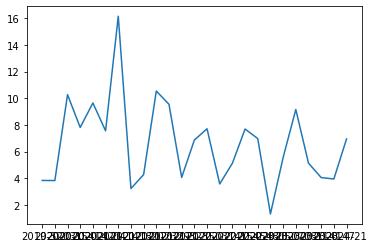

In [8]:
#plot the demand
import matplotlib.pyplot as plt
plt.plot(D_mov_part['PERIOD'], D_mov_part['QUANTITY'])

In [9]:
#calculate the parameters
d_mean = np.mean(D_mov_part['QUANTITY'])

print(f"Mean demand per week: {d_mean}")

Mean demand per week: 6.5941496524730265


### Pull paradigm - kanban system

In [10]:
#assume the storage level is checked once a week
SS_check = 1/7 

#assume a week is necessary to retrieve the quantity from the supploer
SS_supply = 1

SS = SS_check+SS_supply
WIP = d_mean*(1 + SS)

print(f"WIP level using kanban: {WIP}")

WIP level using kanban: 14.130320683870771


### Lot sizing - economic order quantity (BUY)

In [11]:
#assume the value of the storage cost
h_storage_cost = 7.5 #euro/year

#assume the cost of sending an order
C_prime_order_cost = 0.2 #euro/order

#calculate the total demand per year
Y = d_mean*12

#calculate the optimal lot side
Q_buy=np.sqrt((2*C_prime_order_cost*Y)/h_storage_cost)

print(f"Optimal economic order quantity (EOQ): {Q_buy}")

Optimal economic order quantity (EOQ): 2.054326112763681


### Lot sizing - economic order quantity (MAKE)

In [12]:
#assume the value of the storage cost
h_storage_cost = 7.3 #euro/year

#assume the cost of setup the machine to process the part
C_prime_setup_cost = 120 #euro/setup

#calculate the total demand per year
Y = d_mean*12

#assume the productivity
X = Y*1.03

#calculate the optimal lot side
Q_make=np.sqrt((2*C_prime_setup_cost*Y)/h_storage_cost)*np.sqrt(X/(X-Y))

print(f"Optimal economic order quantity (EOQ): {Q_make}")

Optimal economic order quantity (EOQ): 298.8630321819757


### Spare parts management - Poisson method

In [13]:
from scipy.stats import poisson
# use the poisson distribution to estimate the probability
mu = d_mean


#assume the value of the storage cost
h_storage_cost = 70 #euro/year

#assume the cost of stockout
C_stockout_cost = 99 #euro/stockout


In [14]:
#define a dataframe with the results
D_prod = pd.DataFrame(columns=['Q','CDF','PDF'])

#define the probability
Q_min = 0
Q_max = int(3*d_mean)
for Q in range(Q_min,Q_max+1):
    storage_qty_prob = poisson.cdf(Q, mu)
    storage_qty_prob_point = poisson.cdf(Q, mu) -  poisson.cdf(Q-1, mu)
    D_prod = D_prod.append(pd.DataFrame([[Q, storage_qty_prob, storage_qty_prob_point]],columns=D_prod.columns))


# define the storage cost
D_prod=D_prod.reset_index(drop=True)
D_prod['STORAGE_COST']=np.nan
for index,row in D_prod.iterrows():
    storage_cost = 0
    for q in range(0,index+1):
        #print(D_prod.iloc[q]['PDF'])
        storage_cost = storage_cost + D_prod.iloc[q]['Q'] * D_prod.iloc[q]['PDF']
        #print(storage_cost)
    D_prod.at[index,'STORAGE_COST'] = storage_cost*h_storage_cost
    
# define the stockout cost
D_prod['STOCKOUT_COST']=np.nan
for index,row in D_prod.iterrows():
    stockout_prob = 0
    for q in range(index,max(D_prod.index)):
        #print(D_prod.iloc[q]['PDF'])
        stockout_prob = stockout_prob + D_prod.iloc[q]['PDF']
        stockout_cost = (stockout_prob)*C_stockout_cost*d_mean
        #print(storage_cost)
    D_prod.at[index,'STOCKOUT_COST'] = stockout_cost

#calculate the total cost
D_prod['TOTAL_COST'] = D_prod['STOCKOUT_COST'] + D_prod['STORAGE_COST']

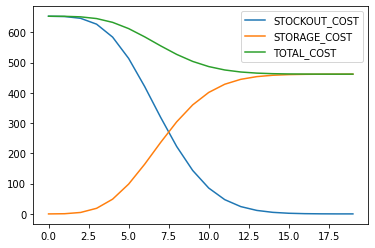

In [15]:
plt.plot(D_prod['Q'], D_prod['STOCKOUT_COST'])
plt.plot(D_prod['Q'], D_prod['STORAGE_COST'])
plt.plot(D_prod['Q'], D_prod['TOTAL_COST'])
plt.legend(["STOCKOUT_COST", "STORAGE_COST","TOTAL_COST"])


In [16]:
#Display the results dataframe
display(HTML(D_prod.head().to_html()))

,Q,CDF,PDF,STORAGE_COST,STOCKOUT_COST,TOTAL_COST
0,0,0.001368,0.001368,0.000000,652.781084,652.781084
1,1,0.010391,0.009023,0.631617,651.887796,652.519414
2,2,0.040141,0.029750,4.796596,645.997326,650.793922
3,3,0.105533,0.065392,18.528844,626.576004,645.104848
4,4,0.213334,0.107801,48.713010,583.886969,632.599979
